Test MSE: 0.3332896828651428
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


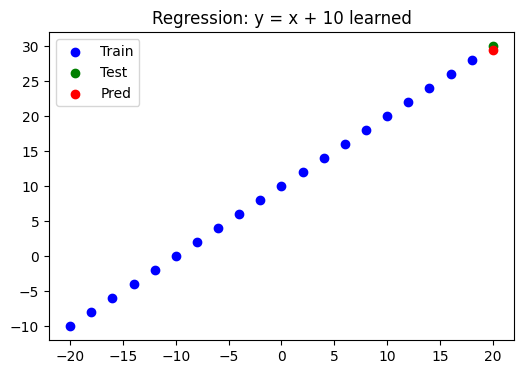

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Synthetic linear data
X = np.arange(-20, 21, 2, dtype=np.float32) # [-20, -18, ..., 20]
y = X + 10

# Train/test split (simple)

X_train, y_train = X[:20], y[:20]
X_test, y_test = X[20:], y[20:]
# 1) CREATE
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(1,)),
tf.keras.layers.Dense(1) # linear output for regression
])


# 2) COMPILE
model.compile(
loss="mse", # changed from MAE → MSE to help the model notice big mistakes
optimizer=tf.keras.optimizers.SGD(learning_rate=0.005), # reduced from 0.01 to make learning more acccurate
metrics=["mse"] 
)
# 3) FIT
history = model.fit(X_train, y_train, epochs=300, verbose=0) # increased from 100 to 300 so the model learns better
# Evaluate
loss, mse = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", mse)
# Predict and visualize
y_pred = model.predict(X_test).squeeze()
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, c='b', label='Train')
plt.scatter(X_test, y_test, c='g', label='Test')
plt.scatter(X_test, y_pred, c='r', label='Pred')
plt.legend(); plt.title("Regression: y = x + 10 learned")
plt.show()